In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
register_matplotlib_converters()
from time import time

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


### Icecream production data

In [ ]:
def parser(s):
  return datetime.strptime(s, '%Y-%m-%d')

In [ ]:
# read csv file
series_ic = pd.read_csv('/content/ice_cream.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

In [ ]:
type(series_ic)

pandas.core.series.Series

In [ ]:
series_ic.rename('prod_ice', inplace=True)

DATE
1972-01-01     59.9622
1972-02-01     67.0605
1972-03-01     74.2350
1972-04-01     78.1120
1972-05-01     84.7636
                ...   
2019-09-01    100.1741
2019-10-01     90.1684
2019-11-01     79.7223
2019-12-01     75.7094
2020-01-01     83.6290
Name: prod_ice, Length: 577, dtype: float64

In [ ]:
## Infer the most likely frequency given the input index. If the frequency is
##uncertain, a warning will be printed.
series_ic = series_ic.asfreq(pd.infer_freq(series_ic.index)) 

In [ ]:
series_ic

DATE
1972-01-01     59.9622
1972-02-01     67.0605
1972-03-01     74.2350
1972-04-01     78.1120
1972-05-01     84.7636
                ...   
2019-09-01    100.1741
2019-10-01     90.1684
2019-11-01     79.7223
2019-12-01     75.7094
2020-01-01     83.6290
Freq: MS, Name: prod_ice, Length: 577, dtype: float64

In [ ]:
start_date = pd.to_datetime('2010-01-01')
series_ic = series_ic[start_date:]

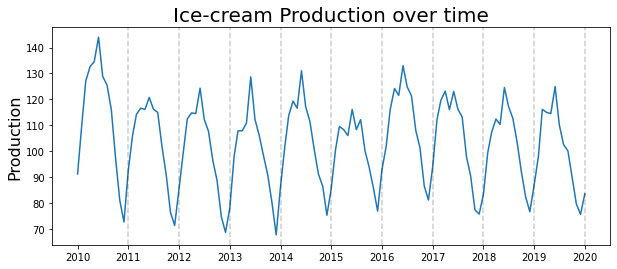

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(series_ic)
plt.title('Ice-cream Production over time', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(2011, 2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
#plt.axhline(lim_catfish_sales.mean(), color='r', alpha=0.2, linestyle='--')


## ACF Plot

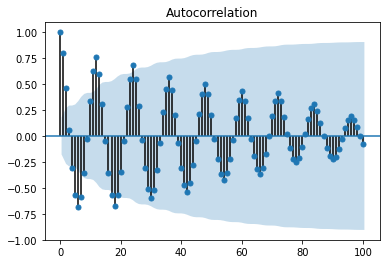

In [ ]:
acf_plot = plot_acf(series_ic, lags=100)

## PACF Plot

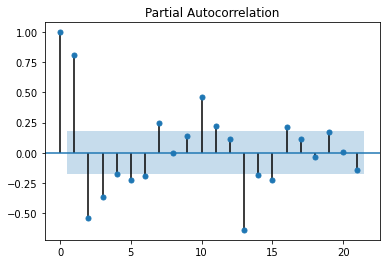

In [ ]:
pacf_plot = plot_pacf(series_ic)

## Training and Testing set

In [ ]:
train_end = datetime(2016,12,1)
test_end = datetime(2019,12,1)
train_data = series_ic[:train_end]
test_data = series_ic[train_end + timedelta(days=1):test_end]

## Fit the data

In [ ]:
# AR model ..therefore in th eorder the MA Part is set to 0
model = ARMA(train_data, order=(3,0))

In [ ]:
start = time()
model_fit = model.fit()
end = time()
print("Model fitting time:", end - start)

Model fitting time: 0.06603074073791504


In [ ]:
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:               prod_ice   No. Observations:                   84
Model:                     ARMA(3, 0)   Log Likelihood                -294.008
Method:                       css-mle   S.D. of innovations              7.903
Date:                Wed, 20 Apr 2022   AIC                            598.015
Time:                        09:35:59   BIC                            610.169
Sample:                    01-01-2010   HQIC                           602.901
                         - 12-01-2016                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            103.5080      2.176     47.575      0.000      99.244     107.772
ar.L1.prod_ice     1.0488      0.099     10.573      0.000       0.854       1.243
ar.L2.prod_ice    -0.0532      0.152

In [ ]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [ ]:
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data - predictions

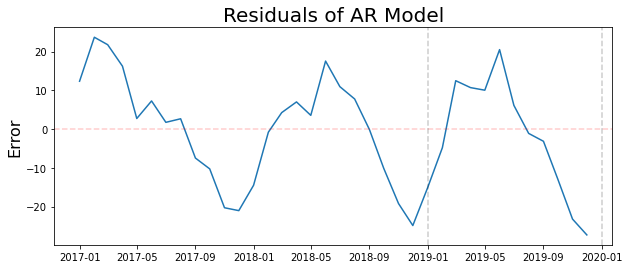

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals of AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', alpha=0.2, linestyle='--')
for year in range(2019, 2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)


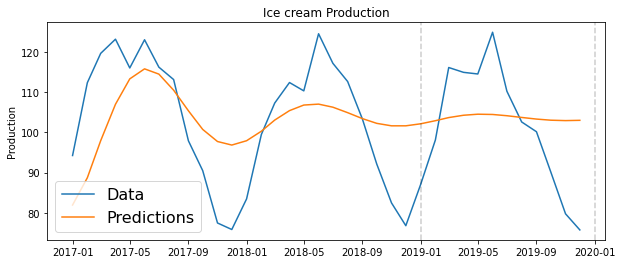

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)
plt.title('Ice cream Production')
plt.ylabel('Production')
for year in range(2019, 2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
